In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
data = pd.read_csv('Mall_Customers.csv')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
CustomerID                200 non-null int64
Genre                     200 non-null object
Age                       200 non-null int64
Annual Income (k$)        200 non-null int64
Spending Score (1-100)    200 non-null int64
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


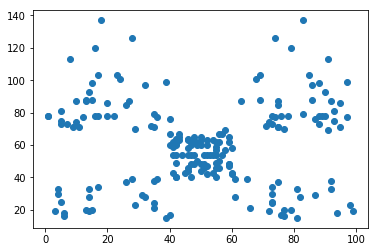

In [4]:
plt.scatter(data['Spending Score (1-100)'],data['Annual Income (k$)'])

In [5]:
features = data.iloc[:,[3,4]].values

In [20]:
from sklearn.cluster import KMeans
model = KMeans(n_clusters=5, random_state=15)

In [21]:
model.fit(features)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=5, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=15, tol=0.0001, verbose=0)

In [22]:
result = model.predict(features)

In [23]:
result

array([4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 1,
       4, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 0, 3, 1, 3, 0, 3, 0, 3,
       1, 3, 0, 3, 0, 3, 0, 3, 0, 3, 1, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3,
       0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3,
       0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3,
       0, 3])

In [24]:
dataFinal = data
dataFinal['result']=result
dataFinal.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),result
0,1,Male,19,15,39,4
1,2,Male,21,15,81,2
2,3,Female,20,16,6,4
3,4,Female,23,16,77,2
4,5,Female,31,17,40,4


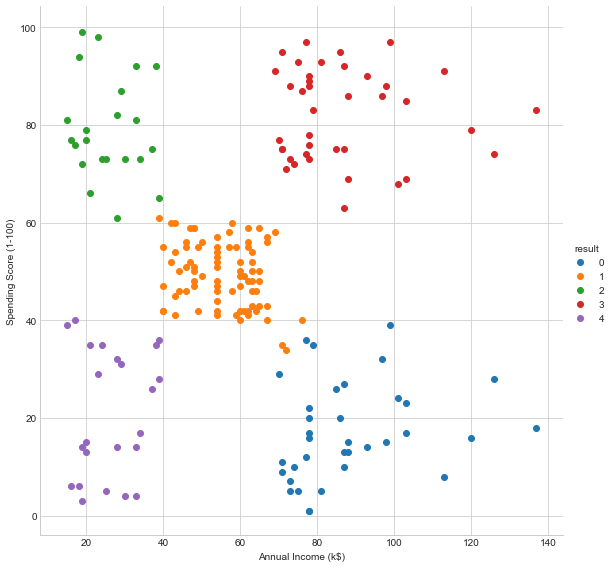

In [25]:
sns.set_style("whitegrid")
sns.FacetGrid(dataFinal, hue="result", size=8) \
   .map(plt.scatter,"Annual Income (k$)","Spending Score (1-100)") \
   .add_legend();
plt.show()

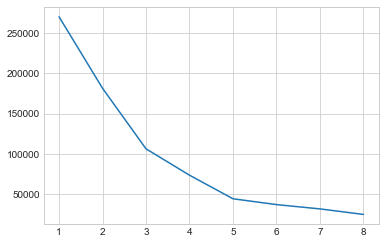

In [34]:
#Technique to identify the ideal K- Value
# WCSS = Within Cluster Sum of Squares
# Elbow Method to identify the ideal K-value (Visual Graph)
from sklearn.cluster import KMeans
wcss=[]
for i in range(1,9):
    tempModel = KMeans(n_clusters = i, random_state=15)
    tempModel.fit(features)
    wcss.append(tempModel.inertia_)

plt.plot(range(1,9),wcss)

In [ ]:
#Whichever is the last elbow value, that will be your ideal K- value for the given use-case